In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import os
from scipy import io
from scipy.stats import pearsonr
import seaborn as sns

In [9]:
combined_data = pd.read_csv('/Users/sorenza_bastiaens/Documents/Paper_2/Data/combined_data_final.csv')
data = combined_data[['x', 'y', 'z', 'Gee', 'Gei', 'Gese', 'Gesre', 'Gsrs', 'alpha', 'beta',
       't0', 'power', 'freq', 'low_exp', 'high_exp']]
correlation_matrix = data.corr(method='pearson')

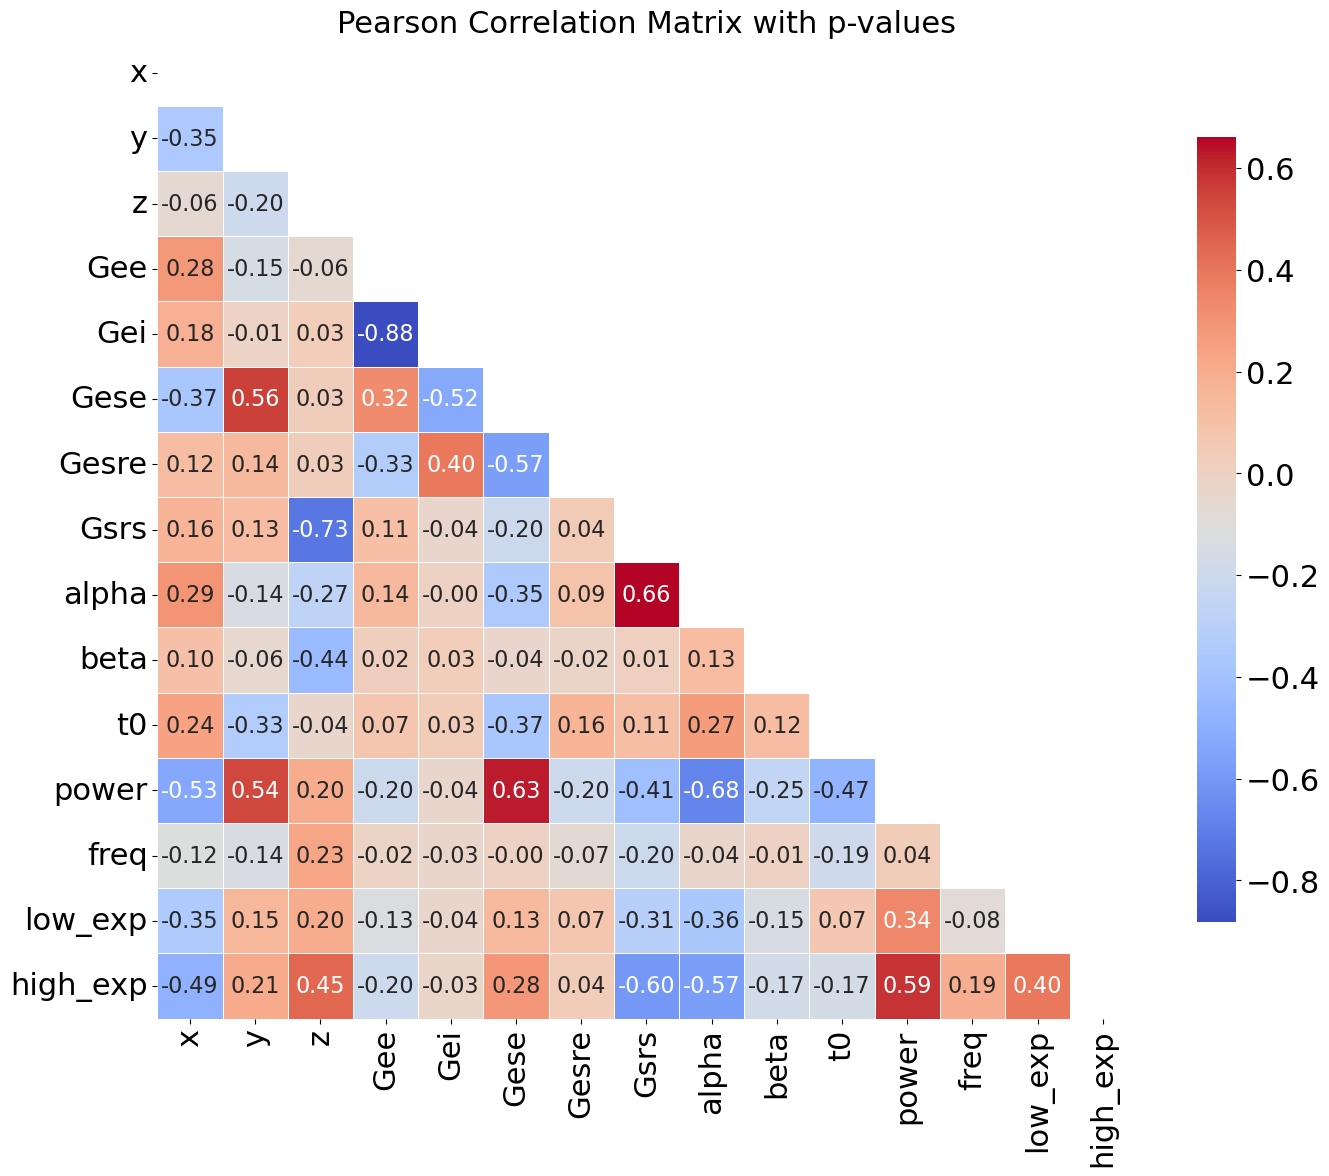

In [11]:
def annot_format(correlation):
    # Reduce decimal places to 2 for correlation, and use scientific notation with 1 decimal for p-value
    return f"{correlation:.2f}"
# Initialize empty DataFrames
correlation_matrix = pd.DataFrame(index=data.columns, columns=data.columns)
# Calculate correlations and p-values
for col1 in data.columns:
    for col2 in data.columns:
        correlation, p_val = pearsonr(data[col1], data[col2])
        correlation_matrix.loc[col1, col2] = correlation

# Prepare the annotations with custom format
annot_labels = correlation_matrix.copy()
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        corr = float(correlation_matrix.loc[row, col])
        annot_labels.loc[row, col] = annot_format(corr) #, p_val)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Convert correlation matrix for float type
correlation_matrix = correlation_matrix.astype(float)
# Plotting the heatmap
plt.figure(figsize=(14, 16))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=annot_labels.values, fmt='', cmap='coolwarm',
                      cbar_kws={"shrink": .5}, square=True, linewidths=.5,
                      annot_kws={"size": 16})  # Custom font size for annotations

# Customize the colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=22)  # Increase colorbar tick label size
  # Increase colorbar label size

# Customize the tick labels and title
plt.title('Pearson Correlation Matrix with p-values', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.savefig('/Users/sorenza_bastiaens/Documents/Paper_2/Figures_Paper_2/outputs/Pearson_correlations.png', dpi=300)
plt.tight_layout()

plt.show()